# Kurapati Venkatesh
# 09012021
# Topic: K-means Clustering

# ---------------------------------------------------------------------------

## 4.)	Perform clustering analysis on the telecom dataset. The data is a mixture of both categorical and numerical data. It consists the number of customers who churn. Derive insights and get possible information on factors that may affect the churn decision. Refer to Telco_customer_churn.xlsx dataset.

## -----------------------------------------------------------------------------------

### Business objective: The final goal will be evaluate different models to predict if a customer will “Churn” or not.

#### For does not familiar churn is most commonly expressed as the percentage (or number) of service subscribers who discontinue their subscriptions within a given time period.

## -------------------------------------------------------------------------------------------

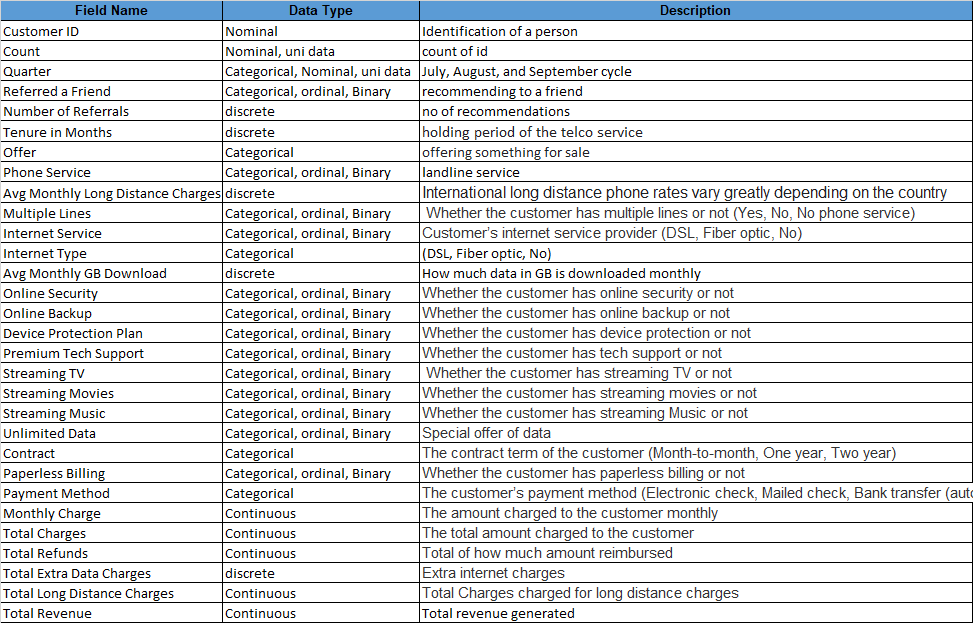

## ---------------------------------------------------------------------------------------------------------------------------

In [1]:
import seaborn as sns # for data visualization
import pandas as pd # for data analysis
import numpy as np # for numeric calculation
import matplotlib.pyplot as plt # for data visualization

In [2]:
tcom1 = pd.read_excel("G:/360digit/assignments meterial/H.Clustering/r/Telco_customer_churn.xlsx")

In [3]:
tcom1.describe()

,Count,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,1.951867,32.386767,22.958954,20.515405,64.761692,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,0.0,3.001199,24.542061,15.448113,20.418940,30.090047,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,1.0,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,1.0,0.000000,9.000000,9.210000,3.000000,35.500000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,1.0,0.000000,29.000000,22.890000,17.000000,70.350000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,1.0,3.000000,55.000000,36.395000,27.000000,89.850000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,1.0,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [4]:
tcom1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Count                              7043 non-null   int64  
 2   Quarter                            7043 non-null   object 
 3   Referred a Friend                  7043 non-null   object 
 4   Number of Referrals                7043 non-null   int64  
 5   Tenure in Months                   7043 non-null   int64  
 6   Offer                              7043 non-null   object 
 7   Phone Service                      7043 non-null   object 
 8   Avg Monthly Long Distance Charges  7043 non-null   float64
 9   Multiple Lines                     7043 non-null   object 
 10  Internet Service                   7043 non-null   object 
 11  Internet Type                      7043 non-null   objec

### ----------------------------------------------EDA---------------------------------------------------

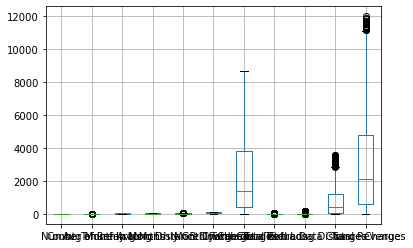

In [6]:
tcom1.boxplot()

Looking at the box plot, it seems that the continuous variables have no outliers in their variables.

##### Histogram Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000196C5F82490>,
      dtype=object)

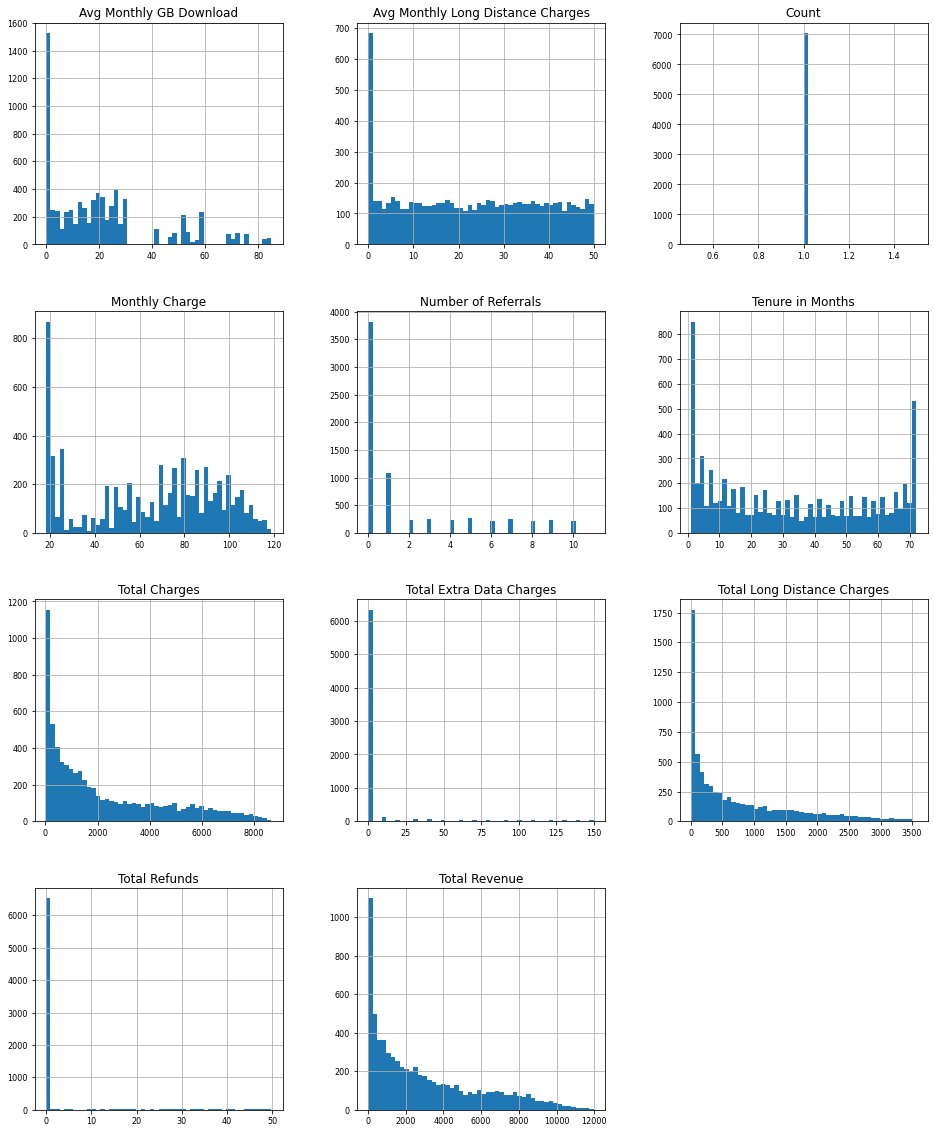

In [7]:
tcom1.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

From above analysis,
"Customer ID" is unnecessary, 
"Count" and  "Quarter" has only one value in all cells of column and is not useful in segmentation,
"Total Refunds" and "Total Extra Data Charges" are having data concentration in single value, Hence these are not useful

In [8]:
tcom = tcom1.drop(["Customer ID", "Count", "Quarter", "Total Refunds", "Total Extra Data Charges" ], axis=1)

##### Corelation Analysis:

In [15]:
tcom.corr()

,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Long Distance Charges,Total Revenue
Number of Referrals,1.000000,0.326975,0.006336,0.038575,0.028173,0.250378,0.216190,0.261853
Tenure in Months,0.326975,1.000000,0.014596,0.049119,0.247582,0.826074,0.674149,0.853146
Avg Monthly Long Distance Charges,0.006336,0.014596,1.000000,-0.030455,0.138396,0.069500,0.599828,0.232291
Avg Monthly GB Download,0.038575,0.049119,-0.030455,1.000000,0.391787,0.223268,0.011373,0.180726
Monthly Charge,0.028173,0.247582,0.138396,0.391787,1.000000,0.651236,0.246300,0.588887
Total Charges,0.250378,0.826074,0.069500,0.223268,0.651236,1.000000,0.610185,0.972212
Total Long Distance Charges,0.216190,0.674149,0.599828,0.011373,0.246300,0.610185,1.000000,0.778559
Total Revenue,0.261853,0.853146,0.232291,0.180726,0.588887,0.972212,0.778559,1.000000


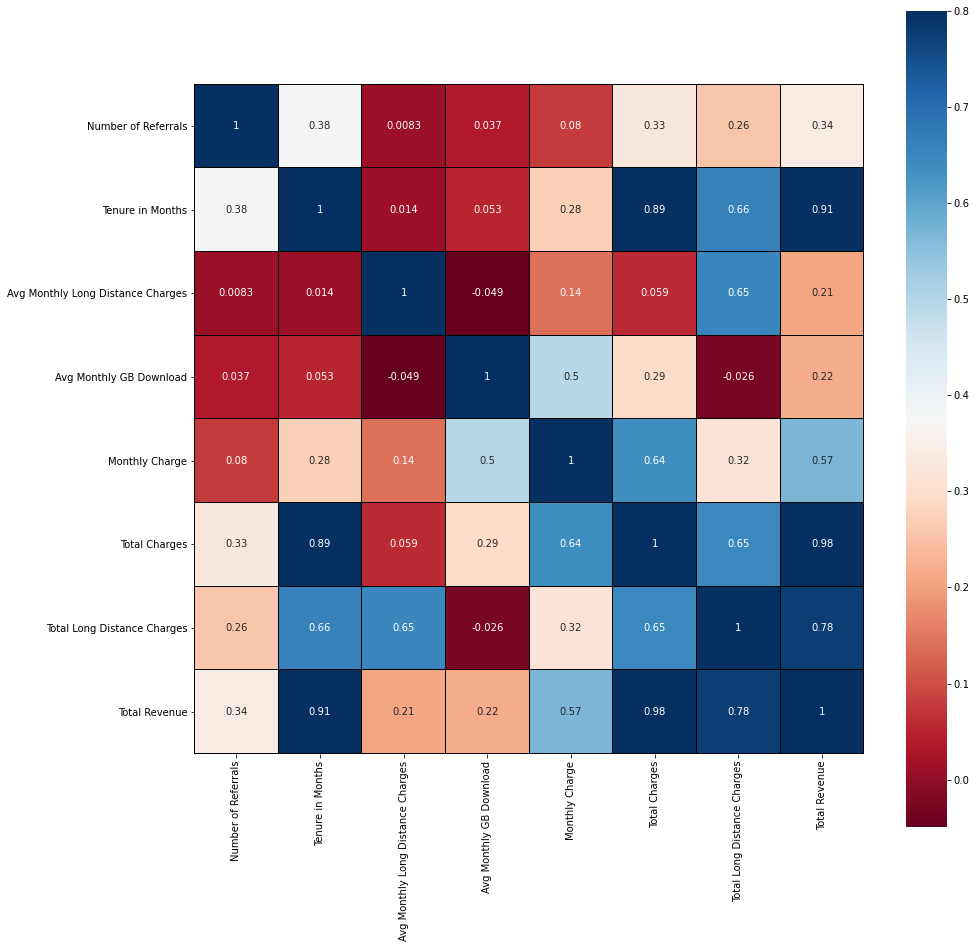

In [16]:
corr = tcom.corr(method='spearman')
plt.figure(figsize=(15,15))
sns.heatmap(corr, vmax = 0.8, linewidths = 0.01, square = True, annot = True, cmap='RdBu', linecolor='black')

There is a high positive correlation between Total Revenue and Tenure in months,
and Total charges and Total revenue, 
and total charges and tenure, 
and revenue and tenure, 
and tenure and carges.

#### gower dissimilarity matrix

In [19]:
import gower
df = gower.gower_matrix(tcom)

### Normalization function 

In [20]:
def norm_func(i):
    x = (i - i.min())/ (i.max() - i.min())
    return (x)

#### Normalized data frame 

In [24]:
df_norm = norm_func(df)
df_norm.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

#### Scree plot or Elbow curve ######################################################

In [25]:
TWSS = []
k = list(range(2, 10))

In [26]:
from sklearn.cluster import KMeans
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    TWSS.append(kmeans.inertia_)
    
TWSS

[553297.3125,
 390141.96875,
 334781.6875,
 301016.5,
 282797.1875,
 267062.375,
 251954.03125,
 241298.59375]

Text(0, 0.5, 'total_within_SS')

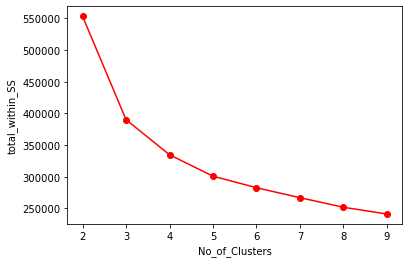

In [27]:
plt.plot(k, TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS")

#### Selecting 3 clusters as optimum number of clusters from scree plot.

In [28]:
model = KMeans(n_clusters = 3)
model.fit(df_norm)

KMeans(n_clusters=3)

In [33]:
model.labels_ # getting the labels of clusters assigned to each row 
mb = pd.Series(model.labels_)  # converting numpy array into pandas series object 
tcom1['clust'] = mb # creating a  new column and assigning it to new column 

In [34]:
tcom1.head()

,Customer ID,Count,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,clust
0,8779-QRDMV,1,Q3,No,0,1,None,No,0.00,No,...,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65,0
1,7495-OOKFY,1,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,...,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10,0
2,1658-BYGOY,1,Q3,No,0,18,Offer D,Yes,11.33,Yes,...,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88,0
3,4598-XLKNJ,1,Q3,Yes,1,25,Offer C,Yes,19.76,No,...,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07,0
4,4846-WHAFZ,1,Q3,Yes,1,37,Offer C,Yes,6.33,Yes,...,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36,0


In [35]:
tcom1 = tcom1.iloc[:,[30,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]]
tcom1.head()

,clust,Customer ID,Count,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,0,8779-QRDMV,1,Q3,No,0,1,None,No,0.00,...,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65
1,0,7495-OOKFY,1,Q3,Yes,1,8,Offer E,Yes,48.85,...,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10
2,0,1658-BYGOY,1,Q3,No,0,18,Offer D,Yes,11.33,...,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88
3,0,4598-XLKNJ,1,Q3,Yes,1,25,Offer C,Yes,19.76,...,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07
4,0,4846-WHAFZ,1,Q3,Yes,1,37,Offer C,Yes,6.33,...,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36


In [37]:
tcom1.iloc[:, 2:31].groupby(tcom1.clust).mean()
tcom1.to_csv("Kmeans_Telco.csv", encoding = "utf-8")

import os
os.getcwd()

'C:\\Users\\Hp\\Documents\\jjjpter'

## Business Recommendations:
### •	Target  Marketing  and  Customer  Segmentation  are  so  closely related that they are often used interchangeably
### •	Through the cluster segmentation, the enterprise can devise segmentation-based marketing strategies.
### •	Once the segments using hierarchical clustering is done, business can make better-informed decisions about marketing to the consumers to increase the level of loyalty to brand.
